# 1. Prepared and Data Extraction

## 1.1 Import necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns


## 1.2 Merge data from each month into one CSV

In [2]:
path = 'E:\PY1\Sales_Months_2019'
dirs = os.listdir(path)
                  

In [3]:
for file in dirs:
   print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
data = []
frames =[]
csv_files = glob.glob(path +'/*.csv')

In [5]:
for file in csv_files:
    df = pd.read_csv(file)
    data.append(df)
    frames.append(df)
    result = pd.concat(frames)

In [6]:
result

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
df_1 = result
df_1.to_csv('Sales2019.csv',index = False)

### 1.3 Understand data

In [8]:
df_1.shape

(186850, 6)

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [10]:
df_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [11]:
df_1.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


### 1.4 Clean up the data!

In [12]:

# Find rows with incorrect values (NaN or infinity)
incorrect_rows = df_1[(df_1.isnull().any(axis=1)) | (df_1.isin([np.inf, -np.inf]).any(axis=1))]
incorrect_rows


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:

df_1 = df_1.dropna()
df_1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Task_1 : What was the best month for sales? How much was earned that month?

In [14]:
df_1.loc[:, 'Month'] = ''
df_1.head()


E:\anaconda\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
E:\anaconda\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",


In [15]:

date_column = 'Order Date'
# Chuyển đổi cột 'Order Date' sang kiểu datetime và lọc các giá trị không hợp lệ
df_1[date_column] = pd.to_datetime(df_1[date_column], errors='coerce')
# Tìm các hàng có giá trị không hợp lệ trong cột 'Order Date'
invalid_rows = df_1[pd.isnull(df_1[date_column])]
# Xoá các hàng không hợp lệ khỏi DataFrame
df_1 = df_1.drop(invalid_rows.index)


<ipython-input-15-89c66e03f94b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[date_column] = pd.to_datetime(df_1[date_column], errors='coerce')


In [16]:
df_1['Month'] = df_1['Order Date'].dt.month
print(set(df_1['Month']))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


<ipython-input-16-f093d93422a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Month'] = df_1['Order Date'].dt.month


In [17]:
print(df_1['Quantity Ordered'].dtypes)
print(df_1['Price Each'].dtypes)

object
object


In [18]:
df_1['Quantity Ordered'] = pd.to_numeric(df_1['Quantity Ordered'],downcast ='integer')# Data type conversion
df_1['Price Each'] = pd.to_numeric(df_1['Price Each'],downcast = 'float')


<ipython-input-18-19b2fb38666d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Quantity Ordered'] = pd.to_numeric(df_1['Quantity Ordered'],downcast ='integer')# Data type conversion
<ipython-input-18-19b2fb38666d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Price Each'] = pd.to_numeric(df_1['Price Each'],downcast = 'float')


In [19]:
df_1['Sales'] = df_1['Quantity Ordered']*df_1['Price Each'] # Calculate sales by row

<ipython-input-19-b9631328eeae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Sales'] = df_1['Quantity Ordered']*df_1['Price Each'] # Calculate sales by row


In [20]:
moving_colum = df_1.pop('Sales')
df_1.insert(4,'Sales',moving_colum) # move the sales column to the 4th column
df_1.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,23.900000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [21]:
sales_value = df_1.groupby('Month').agg({'Sales':'sum'}) #Calculate sales by month
sales_value.reset_index(inplace = True)
sales_value

,Month,Sales
0,1,1786511.25
1,2,2158127.50
2,3,2755969.50
3,4,3336376.50
4,5,3101881.00
5,6,2524465.00
6,7,2587445.00
7,8,2191698.25
8,9,2050361.25
9,10,3679254.25


## Visualize sales by month

<function matplotlib.pyplot.show(close=None, block=None)>

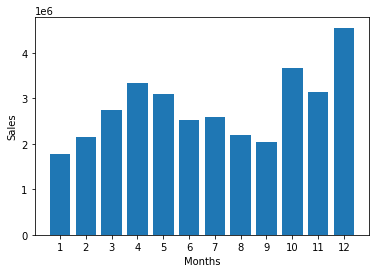

In [22]:
months = range(1,13)
plt.bar(months,height = sales_value['Sales'])
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel('Sales')
plt.show

# Task 2: What City had the highest number of sales?

In [23]:
address_to_city = lambda address:address.split(',')[1]

In [24]:
df_1['City'] = df_1['Purchase Address'].apply(address_to_city)
df_1.head()

<ipython-input-24-49d2fa056d11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['City'] = df_1['Purchase Address'].apply(address_to_city)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.950000,23.900000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.989998,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.000000,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.990000,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.990000,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [25]:
Sales_city_value = df_1.groupby('City').agg({'Sales':'sum'})
Sales_city_value.reset_index(inplace = True)
Sales_city_value

,City,Sales
0,Atlanta,2741642.00
1,Austin,1786745.50
2,Boston,3604080.75
3,Dallas,2717793.75
4,Los Angeles,5354040.00
5,New York City,4581659.00
6,Portland,2276649.25
7,San Francisco,8124121.00
8,Seattle,2693048.50


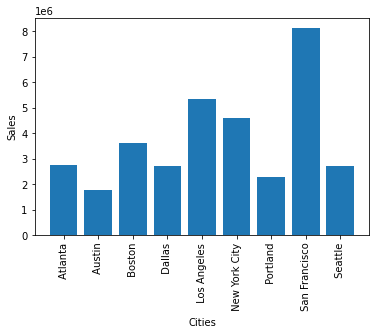

In [34]:
cities = Sales_city_value['City']
sales_values = Sales_city_value['Sales']
plt.bar(cities, height=sales_values)
plt.xticks(cities, rotation=90)
plt.xlabel("Cities")
plt.ylabel('Sales')
plt.show()

# Task 3: What time should we display adverstisement to maximize likelihood of customer's buying product?

In [27]:
df_1['Hours'] = df_1['Order Date'].dt.hour #create column Hours by getting the time information from the column Order Date
df_1

<ipython-input-27-9803499f5948>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Hours'] = df_1['Order Date'].dt.hour #create column Hours by getting the time information from the column Order Date


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hours
0,176558,USB-C Charging Cable,2,11.950000,23.900000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.989998,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,22
3,176560,Google Phone,1,600.000000,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14
4,176560,Wired Headphones,1,11.990000,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14
5,176561,Wired Headphones,1,11.990000,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,8.970000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,20
11682,259354,iPhone,1,700.000000,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,16
11683,259355,iPhone,1,700.000000,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.989990,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco,17


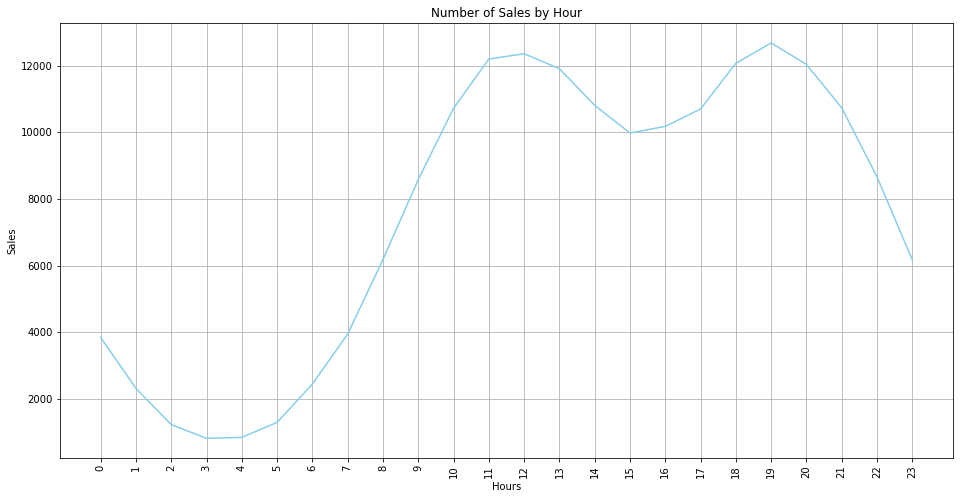

In [46]:
Sales_Hours = df_1.groupby('Hours').agg({'Sales':'count'}) # Count the number of orders by hour
Hours = Sales_Hours.index
sales_counts = Sales_Hours['Sales'].values

plt.figure(figsize=(16,8))
plt.plot(Hours, sales_counts, color='skyblue')
plt.xticks(Hours)
plt.xlabel("Hours")
plt.ylabel('Sales')
plt.title('Number of Sales by Hour')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Task 4 : What product was the best Year for sales? How much was earned that Year?

In [29]:
Sales_Products= df_1.groupby(['Product']).agg({"Quantity Ordered":"sum","Sales":"sum","Price Each": "mean"})
Sales_Products.reset_index(inplace = True)
Sales_Products


,Product,Quantity Ordered,Sales,Price Each
0,20in Monitor,4058.0,4.463394e+05,109.989998
1,27in 4K Gaming Monitor,6134.0,2.392198e+06,389.989990
2,27in FHD Monitor,7429.0,1.114276e+06,149.990005
3,34in Ultrawide Monitor,6076.0,2.308819e+06,379.989990
4,AA Batteries (4-pack),27148.0,1.042483e+05,3.840000
5,AAA Batteries (4-pack),30487.0,9.115613e+04,2.990000
6,Apple Airpods Headphones,15383.0,2.307450e+06,150.000000
7,Bose SoundSport Headphones,13236.0,1.323468e+06,99.989998
8,Flatscreen TV,4724.0,1.417200e+06,300.000000
9,Google Phone,5440.0,3.264000e+06,600.000000


<ipython-input-47-920a45cc261d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Sales_Products.index , rotation='vertical', size=10)
<ipython-input-47-920a45cc261d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels( Sales_Products.index,rotation='vertical', size=10);
<ipython-input-47-920a45cc261d>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


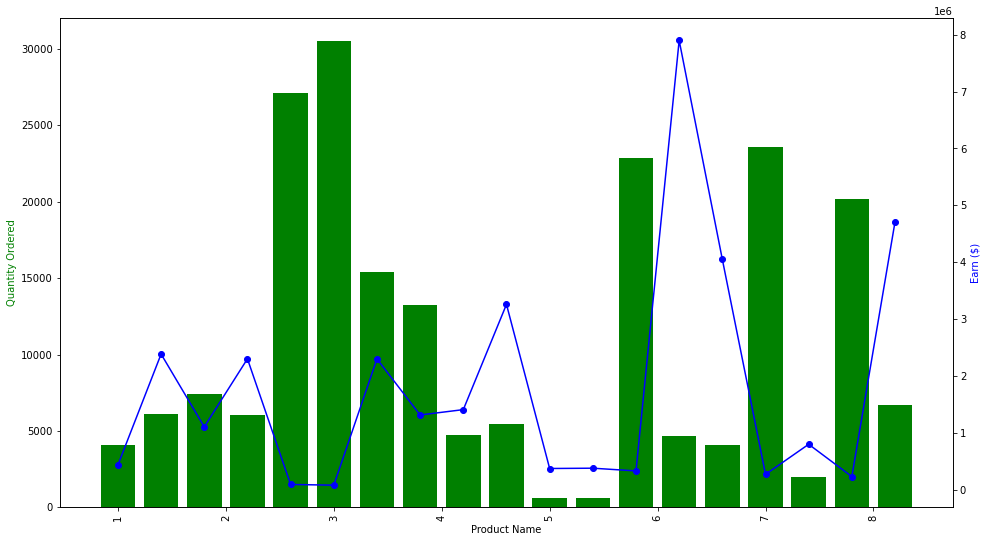

In [47]:
fig, ax1 = plt.subplots(figsize=(16,9))


ax1.bar(Sales_Products.index, Sales_Products['Quantity Ordered'], color='g')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax1.set_xticklabels(Sales_Products.index , rotation='vertical', size=10)

ax2 = ax1.twinx()
ax2.plot(Sales_Products.index, Sales_Products['Sales'], color='b',marker = 'o')
ax2.set_ylabel('Earn ($)', color='b')
ax2.set_xticklabels( Sales_Products.index,rotation='vertical', size=10);
fig.show()


# Task 5: What is the monthly sales of each item? Which products have the most seasonal sales?

In [31]:
Price_sales_month = df_1.groupby(['Product', 'Month']).agg({'Sales':'sum'})
Price_sales_month.reset_index(inplace = True)
Price_sales_month

,Product,Month,Sales
0,20in Monitor,1,23757.839844
1,20in Monitor,2,26837.558594
2,20in Monitor,3,35086.808594
3,20in Monitor,4,42566.128906
4,20in Monitor,5,36846.648438
...,...,...,...
223,iPhone,8,296800.000000
224,iPhone,9,269500.000000
225,iPhone,10,498400.000000
226,iPhone,11,459900.000000


In [32]:
pivot_table = Price_sales_month.pivot(index='Month', columns='Product', values='Sales')
pivot_table

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Month,,,,,,,,,,,,,,,,,,,
1,23757.839844,120116.914062,61795.882812,115896.945312,5368.319824,4670.379883,119700.0,64393.558594,72000.0,187200.0,23400.0,23400.0,16923.400391,396100.0,213997.859375,15116.750000,49600.0,12673.429688,260400.0
2,26837.558594,161845.843750,70045.335938,155415.906250,6524.159668,5770.700195,148500.0,82891.710938,91500.0,225000.0,22200.0,23400.0,21632.650391,462400.0,266997.312500,19394.849609,49600.0,15071.429688,303100.0
3,35086.808594,184465.265625,90893.945312,194174.890625,8355.839844,7229.819824,195000.0,117988.195312,105600.0,273600.0,29400.0,37200.0,27597.699219,630700.0,337996.625000,22788.650391,68000.0,19591.660156,370300.0
4,42566.128906,216834.437500,108892.742188,243193.593750,10632.959961,8656.049805,223650.0,126587.335938,135900.0,340800.0,46200.0,36000.0,35102.597656,759900.0,385996.125000,26588.750000,86400.0,24375.669922,478100.0
5,36846.648438,208644.640625,101243.250000,202154.671875,8970.240234,8596.250000,199950.0,115388.460938,117300.0,285000.0,45000.0,37800.0,30483.048828,782000.0,364996.343750,24378.000000,72000.0,22229.458984,438900.0
6,34756.839844,169645.640625,84294.382812,169095.546875,7956.479980,6320.859863,172350.0,97190.281250,108000.0,226800.0,25800.0,31800.0,24742.250000,591600.0,309996.906250,19550.199219,61200.0,17265.599609,366100.0
7,35086.808594,185635.234375,89694.023438,171375.484375,7818.239746,6969.689941,179850.0,103889.609375,116100.0,241200.0,33000.0,31200.0,26551.199219,606900.0,309996.906250,21725.099609,57600.0,18452.609375,344400.0
8,28267.429688,168865.671875,72445.171875,141356.281250,6912.000000,5947.109863,148200.0,85991.398438,96900.0,214200.0,27600.0,27600.0,21184.150391,493000.0,268997.312500,17112.400391,55200.0,15119.389648,296800.0
9,29587.308594,146246.250000,71095.265625,140976.281250,6600.959961,5651.100098,142500.0,80891.906250,85500.0,201600.0,16800.0,27600.0,21049.599609,482800.0,239997.593750,18713.699219,48000.0,15251.279297,269500.0


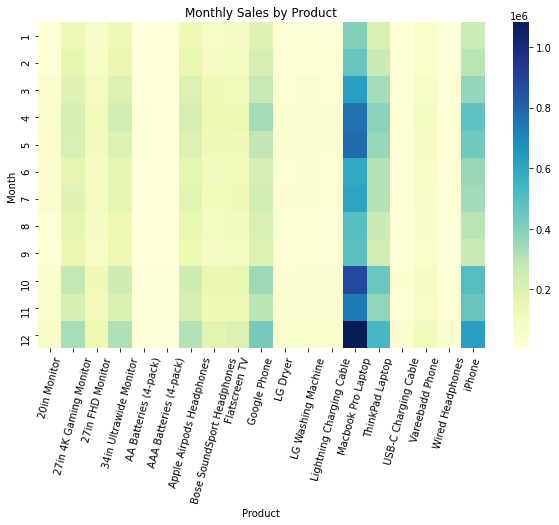

In [33]:

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_table, cmap='YlGnBu', annot=False, fmt='.0f')
plt.title('Monthly Sales by Product')
plt.xlabel('Product')
plt.ylabel('Month')
plt.xticks(rotation=75)
plt.show()
